In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
data = pd.read_csv("Salary_dataset.csv")
data = data.rename(columns={'Unnamed: 0': 'Index'})
data = data.set_index("Index")
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [3]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [4]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data['YearsExperience']

Index
0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64

In [8]:
X = data.drop(['Salary'],axis=1)
Y = data['Salary']

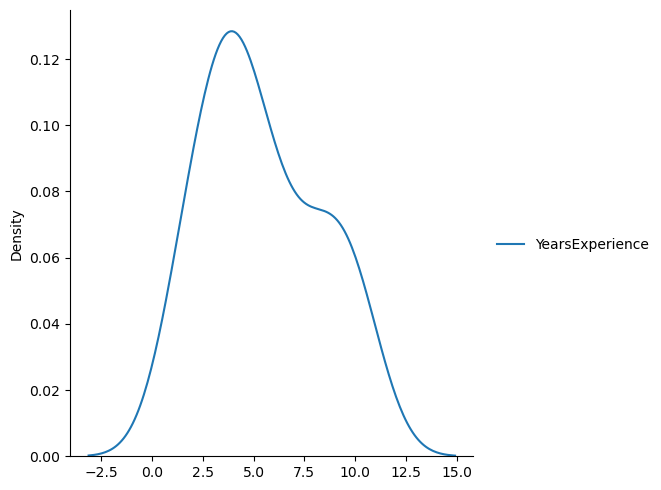

In [9]:
sns.displot(X,kind='kde')

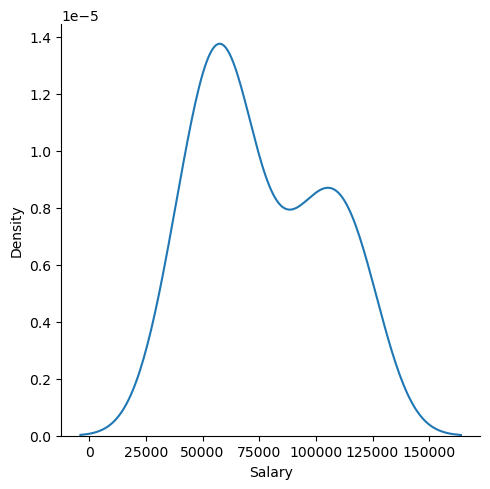

In [10]:
sns.displot(Y,kind = 'kde')

<Axes: >

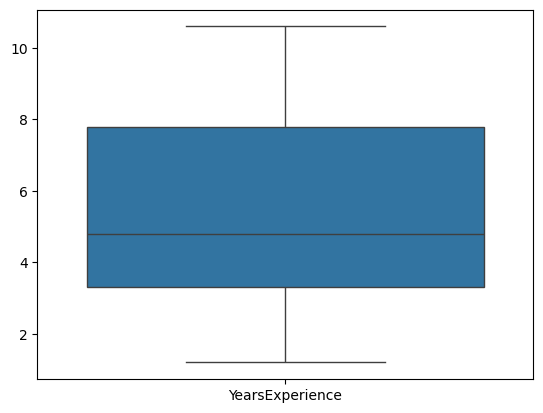

In [11]:
sns.boxplot(X)

<Axes: ylabel='Salary'>

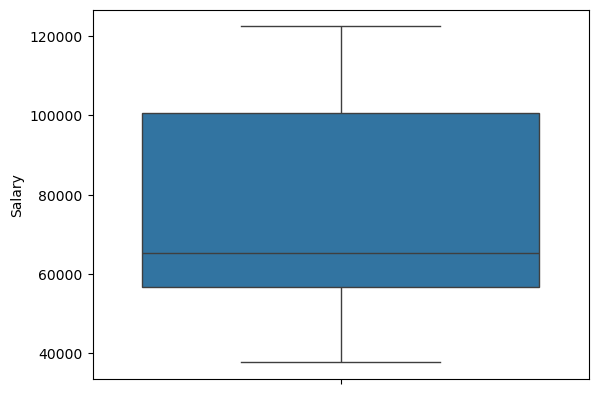

In [12]:
sns.boxplot(Y)

In [13]:
outliers = pd.DataFrame()

for col in data.columns:
    print(col)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    print("Lower Limit", lower_limit)
    upper_limit = Q3 + (1.5 * IQR)
    print("Upper Limit",upper_limit)
    column_non_outliers = data[(data[col] > lower_limit) | (data[col] < upper_limit)]
    outliers = column_non_outliers

outliers

YearsExperience
Lower Limit -3.4499999999999997
Upper Limit 14.55
Salary
Lower Limit -9014.25
Upper Limit 166281.75


,YearsExperience,Salary
Index,,
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0


In [14]:
X_test,X_train,Y_test,Y_train = train_test_split(X,Y,test_size = 0.35, random_state=42)

In [15]:
X_test

,YearsExperience
Index,
16,5.2
5,3.0
13,4.2
11,4.1
22,8.0
1,1.4
2,1.6
25,9.1
3,2.1


In [16]:
X_train

,YearsExperience
Index,
27,9.7
15,5.0
23,8.3
17,5.4
8,3.3
9,3.8
28,10.4
24,8.8
12,4.1


In [17]:
Y_test

Index
16     66030.0
5      56643.0
13     57082.0
11     55795.0
22    101303.0
1      46206.0
2      37732.0
25    105583.0
3      43526.0
21     98274.0
26    116970.0
18     81364.0
29    121873.0
20     91739.0
7      54446.0
10     63219.0
14     61112.0
19     93941.0
6      60151.0
Name: Salary, dtype: float64

In [18]:
Y_train

Index
27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
28    122392.0
24    109432.0
12     56958.0
0      39344.0
4      39892.0
Name: Salary, dtype: float64

In [19]:
scaler=StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [20]:
X_train_norm

array([[ 1.34705117],
       [-0.22147463],
       [ 0.87983072],
       [-0.08798307],
       [-0.78881375],
       [-0.6219493 ],
       [ 1.5806614 ],
       [ 1.04669517],
       [-0.52183063],
       [-1.48964443],
       [-1.12254264]])

<Axes: >

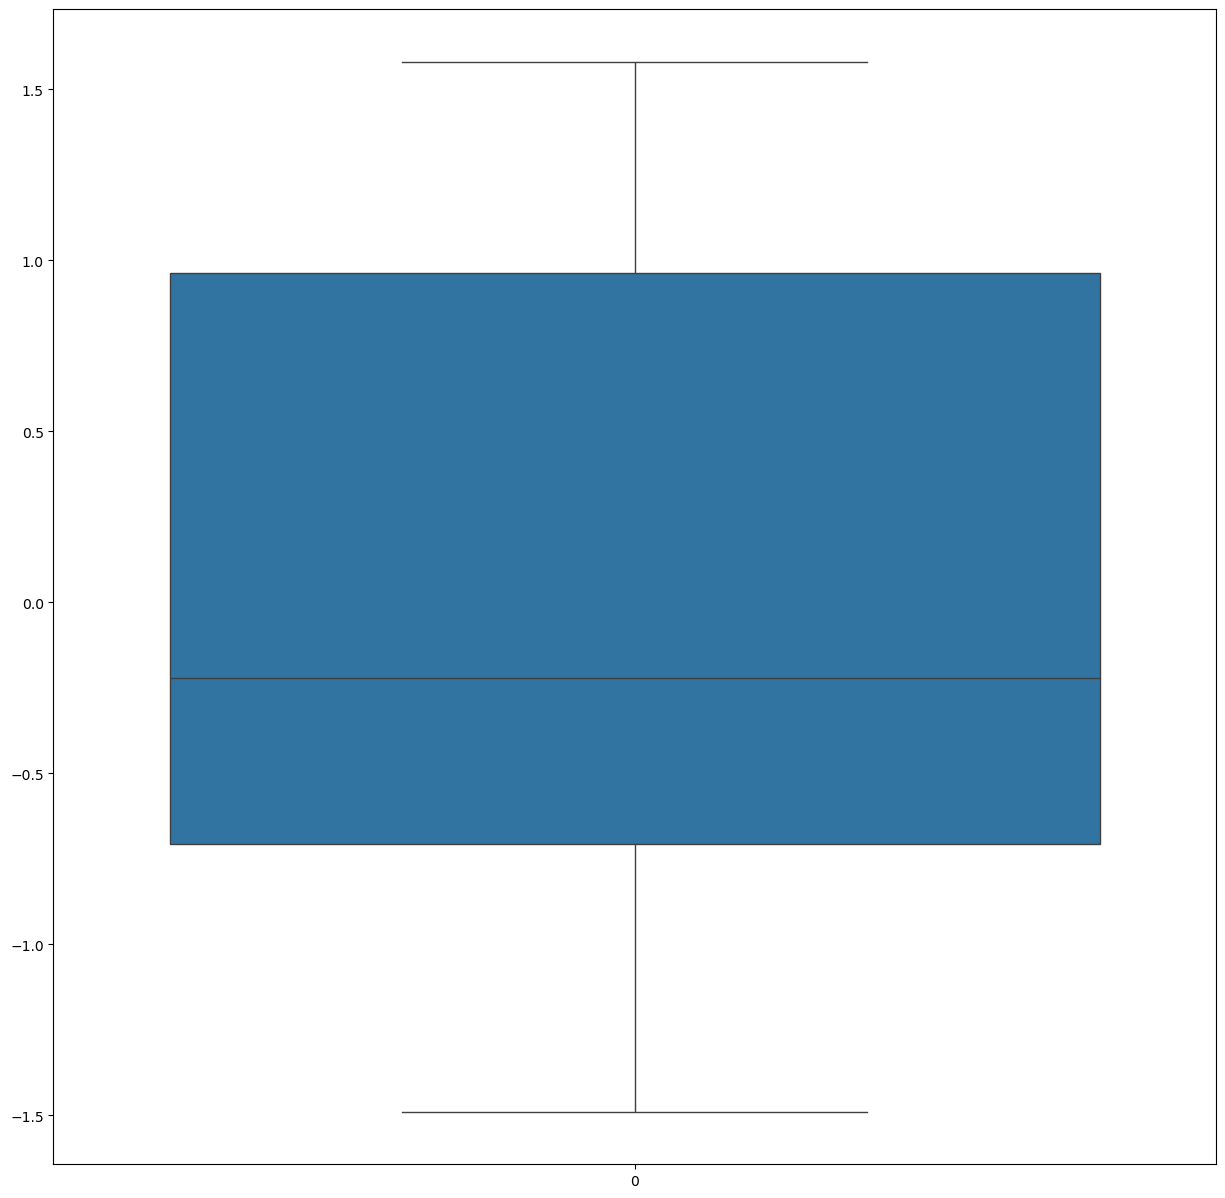

In [21]:
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=X_train_norm,ax=ax)

In [22]:
X_test_norm

array([[-0.15472885],
       [-0.88893242],
       [-0.48845774],
       [-0.52183063],
       [ 0.77971205],
       [-1.42289865],
       [-1.35615287],
       [ 1.14681384],
       [-1.18928842],
       [ 0.51272894],
       [ 1.31367828],
       [ 0.11225426],
       [ 1.64740718],
       [ 0.41261027],
       [-0.78881375],
       [-0.55520352],
       [-0.35496619],
       [ 0.14562715],
       [-0.85555953]])

<Axes: >

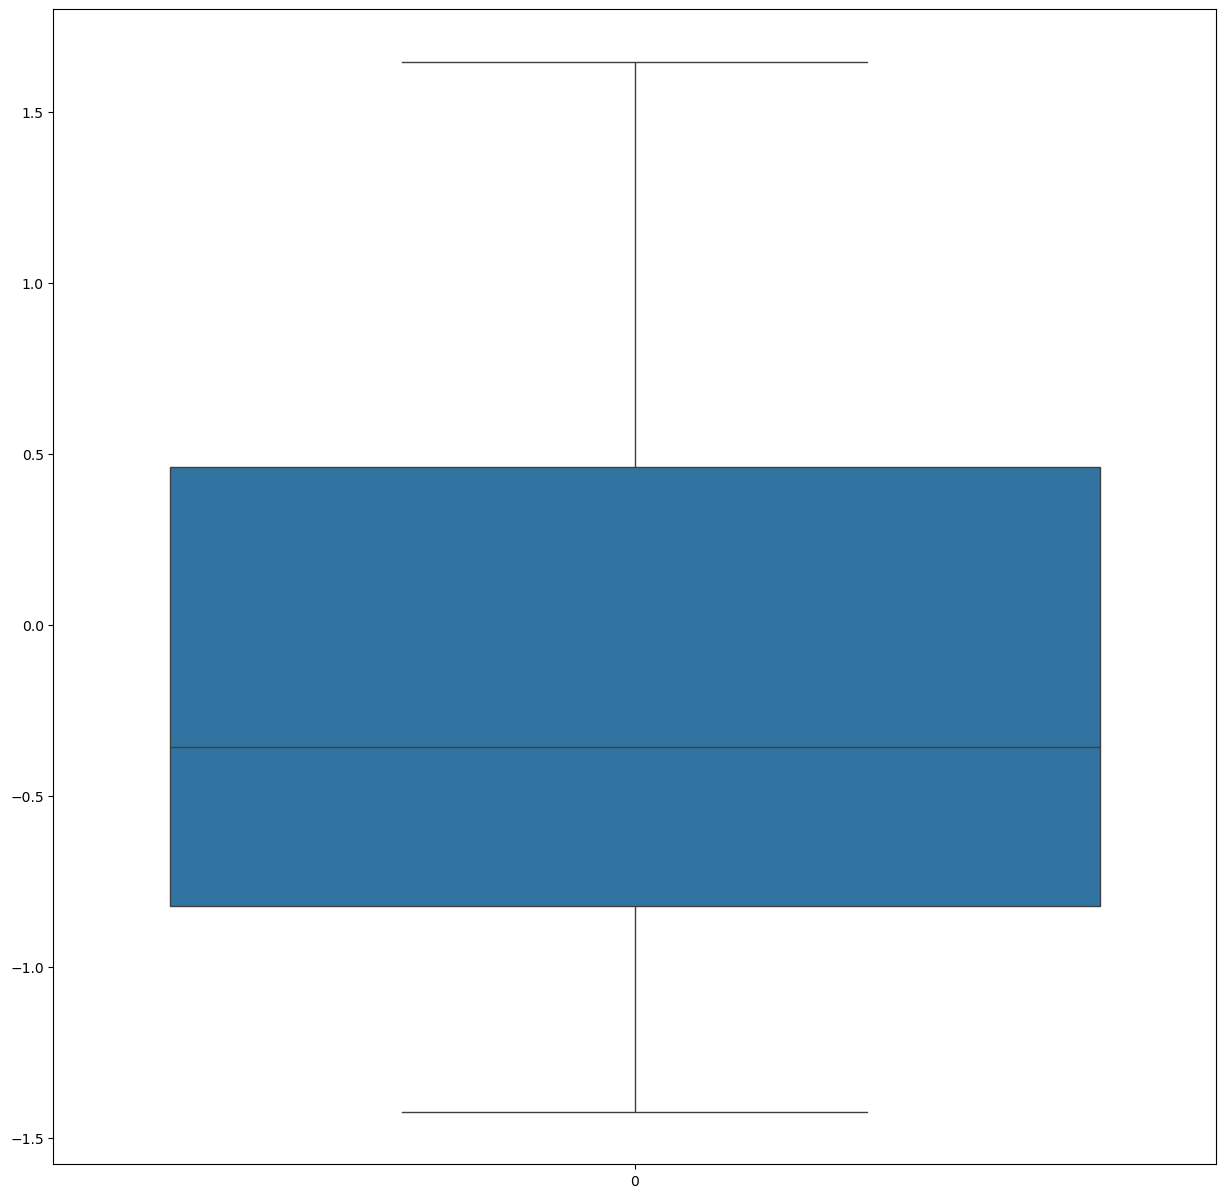

In [23]:
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=X_test_norm,ax=ax)

In [24]:
regression = LinearRegression()
regression.fit(X_train_norm,Y_train)

LinearRegression()

In [25]:
print(regression.coef_)

[28908.27749452]


In [26]:
reg_predict = regression.predict(X_test_norm)
reg_predict

array([ 74357.14635224,  53132.585906  ,  64709.61887668,  63744.86612912,
       101370.22328381,  37696.5419451 ,  39626.04744022, 111982.50350693,
        44449.811178  ,  93652.20130336, 116806.26724471,  82075.16833269,
       126453.79472027,  90757.94306069,  56026.84414867,  62780.11338157,
        68568.6298669 ,  83039.92108025,  54097.33865356])

In [27]:
residual = Y_test - reg_predict
residual

Index
16    -8327.146352
5      3510.414094
13    -7627.618877
11    -7949.866129
22      -67.223284
1      8509.458055
2     -1894.047440
25    -6399.503507
3      -923.811178
21     4621.798697
26      163.732755
18     -711.168333
29    -4580.794720
20      981.056939
7     -1580.844149
10      438.886618
14    -7456.629867
19    10901.078920
6      6053.661346
Name: Salary, dtype: float64

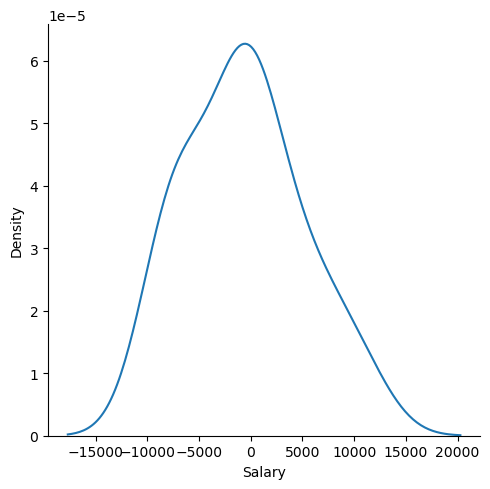

In [28]:
sns.displot(residual,kind = 'kde')

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(Y_test,reg_predict))
print(mean_absolute_error(Y_test,reg_predict))
print(r2_score(Y_test,reg_predict))

30445699.94399193
4352.5653294887425
0.9521525079396339


In [30]:
from sklearn.linear_model import Lasso, Ridge
lasso_regression = Lasso(alpha=1.0)
lasso_regression.fit(X_train_norm,Y_train)

ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train_norm,Y_train)

Ridge()

In [31]:
lasso_pred = lasso_regression.predict(X_test_norm)
lasso_pred

array([ 74357.30108109,  53133.47483842,  64710.10733442,  63745.38795976,
       101369.44357176,  37697.96484375,  39627.40359309, 111981.3566931 ,
        44451.00046642,  93651.68857443, 116804.95356643,  82075.05607842,
       126452.1473131 ,  90757.53045043,  56027.63296242,  62780.66858509,
        68568.98483309,  83039.77545309,  54098.19421309])

In [32]:
ridge_pred = ridge_regression.predict(X_test_norm)
ridge_pred

array([ 74729.89173198,  55274.04465626,  65886.32487938,  65001.96819412,
        99491.87891925,  41124.3376921 ,  42893.05106262, 109219.80245711,
        47314.83448892,  92417.02543717, 113641.58588341,  81804.74521406,
       122485.15273601,  89763.95538139,  57927.11471204,  64117.61150886,
        69423.75162042,  82689.10189932,  56158.40134152])

In [33]:
print(np.sqrt(mean_squared_error(Y_test,lasso_pred)))

5517.625240072008


In [34]:
print(np.sqrt(mean_squared_error(Y_test,ridge_pred)))

5608.157899358916
